In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from pandas import DataFrame
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches

/Users/jackbett/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



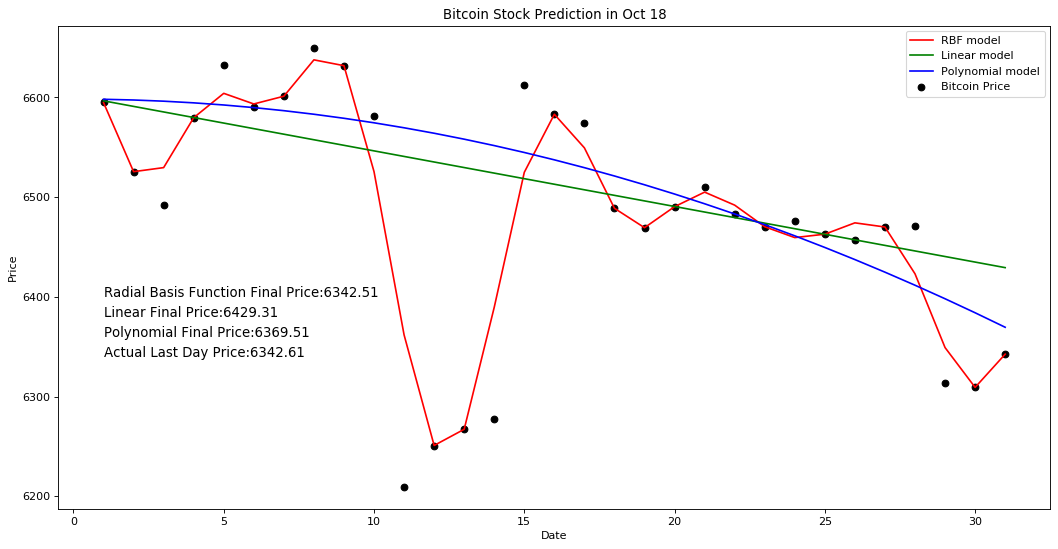

/Users/jackbett/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



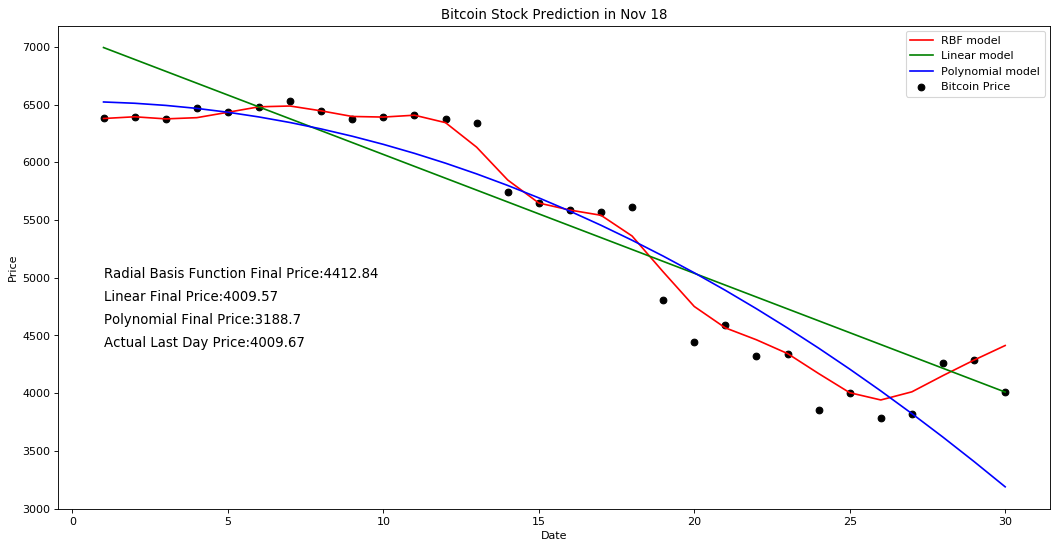

/Users/jackbett/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



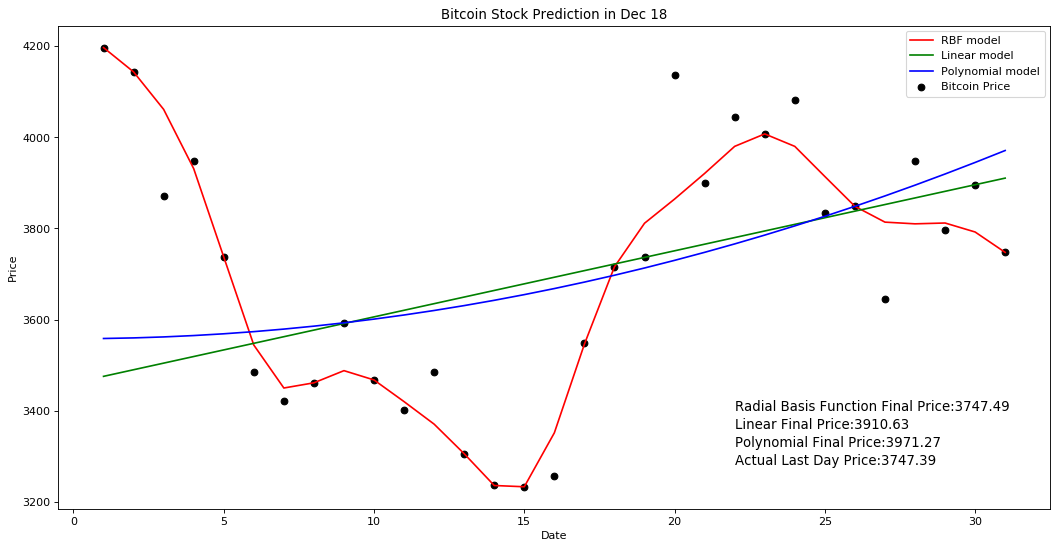

In [2]:

bitcoin_data = pd.read_csv('BTC-USD.csv')

# print(bitcoin_data)


bitcoin_data = DataFrame(bitcoin_data, columns = ['Date', 'Close'])


bc_data_october = bitcoin_data[17:48]
bc_data_november = bitcoin_data[48:78]
bc_data_december = bitcoin_data[78:109]
# print(bc_data_october)
# print(bc_data_november)
# print(bc_data_december)



fig_oct = px.line(bc_data_october, x = 'Date', y = 'Close', title='Bitcoin Price October 18')
fig_nov = px.line(bc_data_november, x = 'Date', y = 'Close', title='Bitcoin Price November 18')
fig_dec = px.line(bc_data_december, x = 'Date', y = 'Close', title='Bitcoin Price December 18')



#bitcoin_data_v1.shape 366,2



last_date_october = bc_data_october.tail(1)
last_date_november = bc_data_november.tail(1)
last_date_december = bc_data_december.tail(1)

# bitcoin_data_v1 = bitcoin_data_v1.head(len(bitcoin_data_v1)-1)



bitcoin_data_dates_oct = bc_data_october.loc[:, 'Date']
bitcoin_data_dates_nov = bc_data_november.loc[:, 'Date']
bitcoin_data_dates_dec = bc_data_december.loc[:, 'Date']

bitcoin_data_close_oct = bc_data_october.loc[:, 'Close']
bitcoin_data_close_nov = bc_data_november.loc[:, 'Close']
bitcoin_data_close_dec = bc_data_december.loc[:, 'Close']



# print(bitcoin_data_dates_oct)

dates_oct = []
prices_oct = []


dates_nov = []
prices_nov = []


dates_dec = []
prices_dec = []

for dater in bitcoin_data_dates_oct:
#     print(dater)
#     print(int(dater.split('-')[2]))
    dates_oct.append([int(dater.split('-')[2])])

        
for dater in bitcoin_data_dates_nov:
    dates_nov.append([int(dater.split('-')[2])])
    
for dater in bitcoin_data_dates_dec:
    dates_dec.append([int(dater.split('-')[2])])
    
    
    
for close_price in bitcoin_data_close_oct:
        prices_oct.append(float(close_price))

for close_price in bitcoin_data_close_nov:
        prices_nov.append(float(close_price))
     
for close_price in bitcoin_data_close_dec:
        prices_dec.append(float(close_price))
        

    

def predict_prices(dates, prices, x, monthcheck):
  
  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1000)
  svr_poly = SVR(kernel='poly', C=1000, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1)
  
  #Train the models on the dates and prices
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
    
# #   #Plot the models on a graph to see which has the best fit

  plt.figure(figsize=(16,8), dpi=80)
  plt.scatter(dates, prices, color = 'black', label='Bitcoin Price')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
    
  if monthcheck == "oct":  
      plt.text( 1,6400, "Radial Basis Function Final Price:" + str(round(svr_rbf.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,6380, "Linear Final Price:" + str(round(svr_lin.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,6360, "Polynomial Final Price:" + str(round(svr_poly.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,6340, "Actual Last Day Price:" + str(round(last_date_october['Close'].values[0],2)), fontsize = 12 ) 

      plt.xlabel('Date')
      plt.ylabel('Price')
      plt.title('Bitcoin Stock Prediction in Oct 18')
      plt.legend()

      plt.show()
        
  elif monthcheck == "nov": 
      plt.text( 1,5000, "Radial Basis Function Final Price:" + str(round(svr_rbf.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,4800, "Linear Final Price:" + str(round(svr_lin.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,4600, "Polynomial Final Price:" + str(round(svr_poly.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 1,4400, "Actual Last Day Price:" + str(round(last_date_november['Close'].values[0],2)), fontsize = 12 ) 

      plt.xlabel('Date')
      plt.ylabel('Price')
      plt.title('Bitcoin Stock Prediction in Nov 18')
      plt.legend()

      plt.show()
  
  elif monthcheck == "dec":
      plt.text( 22,3400, "Radial Basis Function Final Price:" + str(round(svr_rbf.predict(x)[0], 2)), fontsize = 12 )  
      plt.text( 22,3360, "Linear Final Price:" + str(round(svr_lin.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 22,3320, "Polynomial Final Price:" + str(round(svr_poly.predict(x)[0],2)), fontsize = 12 )  
      plt.text( 22,3280, "Actual Last Day Price:" + str(round(last_date_december['Close'].values[0],2)), fontsize = 12 ) 

      plt.xlabel('Date')
      plt.ylabel('Price')
      plt.title('Bitcoin Stock Prediction in Dec 18')
      plt.legend()

      plt.show()


# fig_oct.show()
predict_prices(dates_oct, prices_oct, [[31]], "oct")


# fig_nov.show()
predict_prices(dates_nov, prices_nov, [[30]], "nov")


# fig_dec.show()
predict_prices(dates_dec, prices_dec, [[31]], "dec")


